# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs 
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=28dd5bd9fdcd0365d2a88aabf63d3125&units=imperial&q=


In [4]:
# Create lists to store data for dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | san ramon
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | progreso
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | satinka
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | boyolangu
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | lokosovo
Processing Record 12 of Set 1 | tayu
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | sitka
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | barrow
City not found. Skipping...
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | byron bay
Processing Record 22 of Set 1 | sudak
Processing Record 23 of Set 1 | paamiut
City not fou

Processing Record 43 of Set 4 | kodinsk
Processing Record 44 of Set 4 | samarinda
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | harbour breton
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | phan rang
Processing Record 49 of Set 4 | marawi
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | kaeo
City not found. Skipping...
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | egvekinot
Processing Record 5 of Set 5 | luau
Processing Record 6 of Set 5 | markova
Processing Record 7 of Set 5 | apple valley
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 5 | nanae
Processing Record 9 of Set 5 | iqaluit
Processing Record 10 of Set 5 | khatanga
Processing Record 11 of Set 5 | sierra vista
Processing Record 12 of Set 5 | sabang
Processing Record 13 of Set 5 | igarka
Processing Record 14 of Set 5 | praia da vitoria
Processing Record 15 of Set 5 | mys shmidta
Processing Re

Processing Record 33 of Set 8 | carballo
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | aracati
Processing Record 36 of Set 8 | lhokseumawe
Processing Record 37 of Set 8 | buin
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | san felipe
Processing Record 40 of Set 8 | iisalmi
Processing Record 41 of Set 8 | ekimchan
Processing Record 42 of Set 8 | sinnamary
Processing Record 43 of Set 8 | macapa
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | beya
Processing Record 46 of Set 8 | porangatu
Processing Record 47 of Set 8 | zhangjiakou
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | qui nhon
Processing Record 1 of Set 9 | komsomolskiy
Processing Record 2 of Set 9 | sarakhs
Processing Record 3 of Set 9 | bambous virieux
Processing Record 4 of Set 9 | jiuquan
City not found. Skipping...
Processing Record 5 of Set 9 | ludvika
Processing Record 6 of Set 9 | nabire
Processing Record 7 of Set 9 | oy

Processing Record 24 of Set 12 | mahabad
Processing Record 25 of Set 12 | moree
City not found. Skipping...
Processing Record 26 of Set 12 | tibati
Processing Record 27 of Set 12 | oktyabrskiy
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | yanam
Processing Record 30 of Set 12 | padang
City not found. Skipping...
Processing Record 31 of Set 12 | dwarka
Processing Record 32 of Set 12 | terrace
City not found. Skipping...
Processing Record 33 of Set 12 | loyga
Processing Record 34 of Set 12 | pacific grove
Processing Record 35 of Set 12 | gujar khan
Processing Record 36 of Set 12 | calvinia
Processing Record 37 of Set 12 | price
City not found. Skipping...
Processing Record 38 of Set 12 | deputatskiy
Processing Record 39 of Set 12 | sattahip
Processing Record 40 of Set 12 | rio gallegos
Processing Record 41 of Set 12 | ambilobe
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary for dataframe
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [6]:
#Create dataframe from dictionary
weather_df = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san ramon,13,ML,1604368830,19,13.30,-4.90,76.68,5.35
1,dikson,99,RU,1604368831,94,73.51,80.55,14.11,11.01
2,kahului,40,US,1604368627,55,20.89,-156.47,89.60,19.46
3,beringovskiy,100,RU,1604368831,89,63.05,179.32,28.62,8.25
4,progreso,75,MX,1604368667,73,21.28,-89.67,77.00,8.05
5,port alfred,84,CD,1604368831,54,-7.03,29.76,76.68,3.42
6,satinka,3,RU,1604368832,89,52.38,41.68,39.83,7.85
7,hobart,0,AU,1604368832,36,-42.88,147.33,82.99,10.29
8,boyolangu,68,ID,1604368832,68,-8.12,111.89,83.52,4.72
9,mar del plata,90,ES,1604368833,100,43.40,-4.01,54.00,4.70


In [7]:
# Export dataframe to csv
# weather_df.to_csv("C:/Users/15038/Desktop/Bootcamp HW/python-api-challenge/WeatherPy/Output/weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_weather_df = weather_df.loc[weather_df["Humidity"] > 100]
clean_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [9]:
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity > 100%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

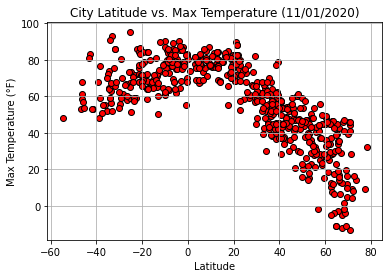

In [11]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="red", marker="o", edgecolor="black")

# Format the graph labels
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show Plot
plt.show()

# Scatter Plot 1 (Latitude and Temp)
#### The code above builds a scatter plot showing the relationship between latitude and temperature. 
#### As we can see, the farther north we go up the globe, the more the temperature drops. This means the two are correlated. 

## Latitude vs. Humidity Plot

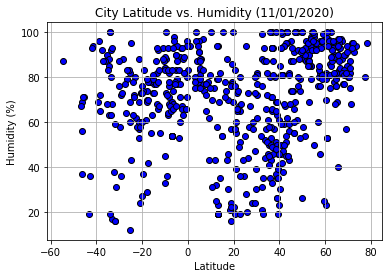

In [12]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

# Scatter Plot 2 (Latitude and Humidity)
#### The code above creates a scatter plot, pulling data from the data frame created above (weather_df). 
#### It demonstrates the relationship between latitude and humididty, which is minimal to none given the random scattering of data. 

## Latitude vs. Cloudiness Plot

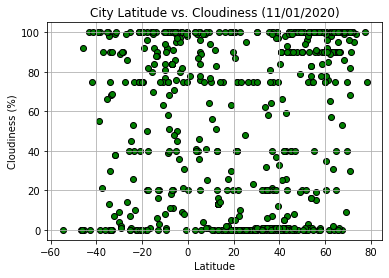

In [13]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="green", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

# Scatter Plot 3 (Latitude and Cloudiness)
#### The code above creates a scatter plot, pulling data from the data frame created above (weather_df). 
#### It demonstrates the relationship between latitude and cloudiness, which is minimal to none given the random scattering of data. 

## Latitude vs. Wind Speed Plot

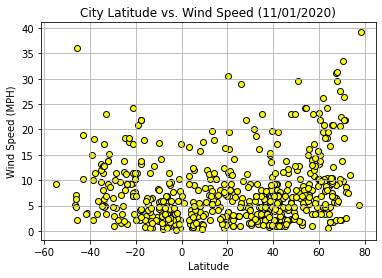

In [14]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

# Scatter Plot 4 (Latitude and Wind Speed)
#### The code above creates a scatter plot, pulling data from the data frame created above (weather_df). 
#### It demonstrates the relationship between latitude and wind speed, which is minimal to none given the random scattering of data. 

## Linear Regression

In [15]:
# Create dataframes for northern and southern cities
nothern = weather_df.loc[weather_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [16]:
# Define regression plot

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8556868288927618


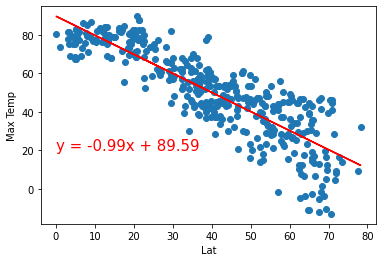

In [26]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,20)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48826581890882753


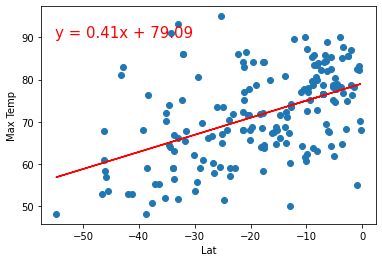

In [18]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

# Northern vs Southern & Temp
#### These two plots and regression show the relationship between latitude and temperature.
#### Latitude has a stronger effect on temperature in the northern hemisphere, as demonstrated by the r value (.85). 
#### In the south however the correlation is much weaker. There is some trend of temperature rising as we get closer to the equator #### but not much and therefore the r value is much lower (.49). I suspect this is because it is summer in the southern hemisphere which skews the data as it is warmer everywhere.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33475189309256836


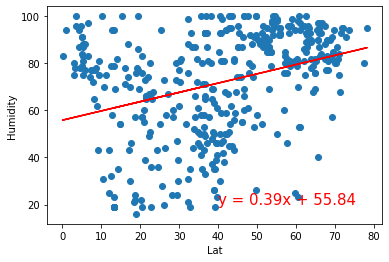

In [29]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,20)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17752341579148895


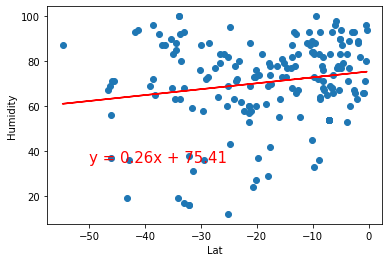

In [20]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-50,35)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2977726552117434


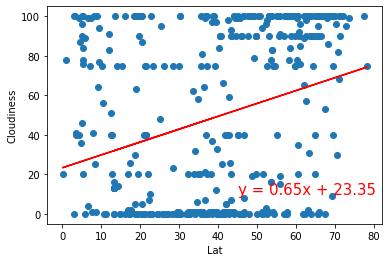

In [21]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2685672015967367


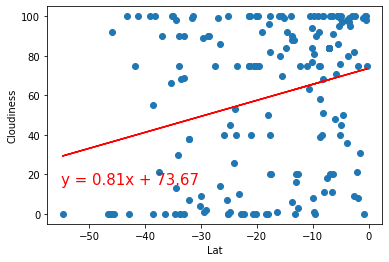

In [22]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.29235577862551143


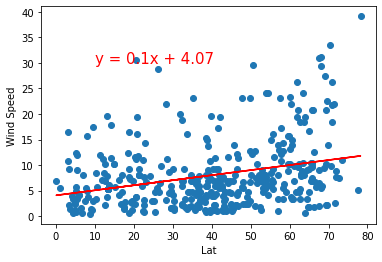

In [27]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (10,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3614635201770625


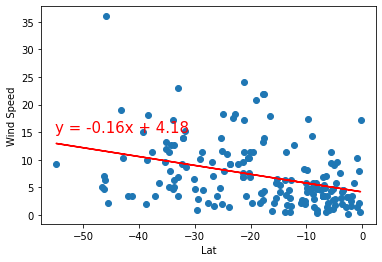

In [24]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)